In [16]:
f(x) = 0
function numerov (N, E, f)
    g(x) = 2*(f(x) - E)
    Delta = 1/N
    phi = zeros(N)
    #definimos los primeros dos elementos
    phi[1] = 0
    phi[2] = 0.001(1 - Delta^2 * g(0)/12)
    #hacemos el paso iterativo
    for i in 3:N
        phi[i] = 2*phi[i - 1] - phi[i - 2] + Delta^2 * g((i - 1) * Delta) * phi[i - 1] / (1 - Delta^2 * g((i - 1) * Delta)/12)
    end
    #regresamos el valor de cada ψ_n  en un arreglo
    return [phi[i]/((1 - Delta^2 * g((i - 1) * Delta)/12)) for i in 1:N]
end
numerov(1000, 5, f)

f (generic function with 1 method)

Para normalizar necesitamos calcular la integral (discreta) de nuestra función. Esta tendrá la forma $|\psi|=\sum\psi_i\Delta$:

In [33]:
function numerov_normaliza (N, E, f)
    norma=0
    phi = numerov (N, E, f)
    for i in 1:N
        norma += (phi[i])^2 #Se va acumulando el valor de la integral
    end
    return phi ./ norma #Se regresa el arreglo de ψ con cada entrada dividida entre la norma.
end

numerov_normaliza (generic function with 1 method)

In [13]:
using PyPlot

INFO: Loading help data...


Graficamos una solución con parámetros arbitrarios para ver qué tan bien jala.

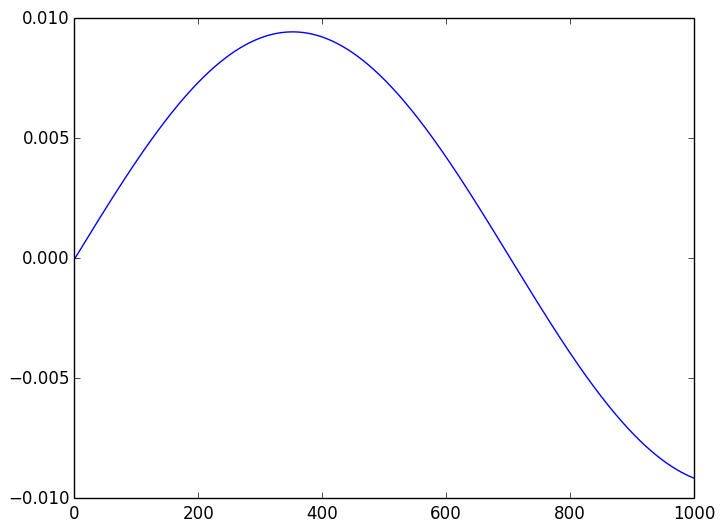

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13498e0c>

In [56]:
plot(1:1000, numerov_normaliza(1000, 10, f))

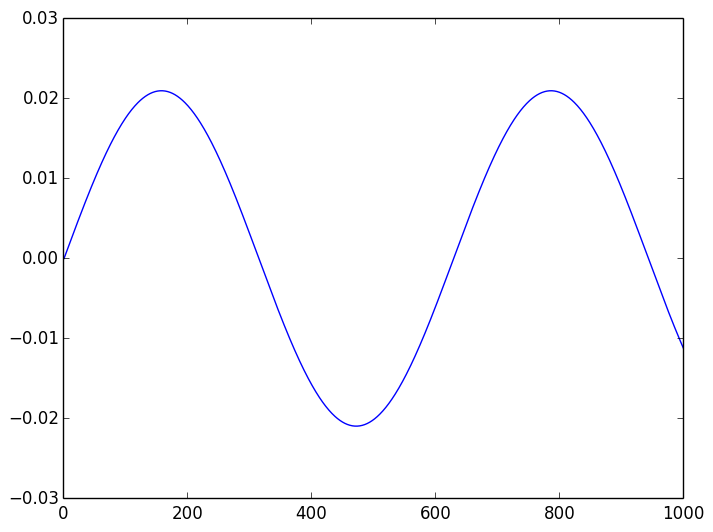

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13879f2c>

In [72]:
plot(1:1000, numerov_normaliza(1000, 50, f))

Vamos a trabajar con un pozo infinito tal que $V(x)=0, x\in [0,1]$ y $V=\infty, x\notin [0,1]$.
La condición de normalización que buscamos es que $\psi(0)=\psi(1)=0$. Usaremos el método de la bisección para ello, definiendo `bisec`, que actuará sobre `numerov_real`, una función que sólo regresa el valor de $\psi(1)$.

In [36]:
function bisec(a, b, f, tol=1e-10)
    #Esta función es recursiva y encuentra una raíz en el intervalo [a,b]
    c = (a+b)/2 #toma el punto medio
    if abs(f(c))<tol
        print(c) #si es el bueno, lo regresa
    elseif f(c)*f(a)>=0
        return bisec(c,b,f)#si no, checa en uno de las mitades
    else
        return bisec(a,c,f)#o en la otra
    end
end

bisec (generic function with 2 methods)

In [37]:
function numerov_real(E)
    N=1000
    g(x) = 2*(-E)
    Delta = 1/N
    phi = zeros(N)
    phi[1] = 0
    phi[2] = 0.1(1 - Delta^2 * g(0)/12)
    for i in 3:N
        phi[i] = 2*phi[i - 1] - phi[i - 2] + Delta^2 * g((i - 1) * Delta) * phi[i - 1] / (1 - Delta^2 * g((i - 1) * Delta)/12)
    end
    #hasta ahora,  hizo lo mismo, pero aquí sólo regresa el último valor del arreglo
    i=N
    return phi[i]/((1 - Delta^2 * g((i - 1) * Delta)/12))
end

numerov_real (generic function with 2 methods)

In [70]:
numerov_real(1) #Vamos a ver cuánto vale nuestra función con E=1

69.82995893044792

In [71]:
numerov_real(5) #Ahora probamos con E=5

-0.5540899093745159

Como hay cambio de signo, le proponemos a nuestra maquinita bisectadora que encuentre una raíz en ese intervalo:

In [52]:
bisec(0, 5, numerov_real, 1e-3)

4.944686629114585

¡Eureka! ¡Eureka! Ahora nos movemos un poquito para ver si encontramos otra:

In [58]:
bisec(7, 20, numerov_real, 1e-2)

19.778746516327374

In [62]:
bisec(30, 50, numerov_real, 1e-2)

44.502179660630645

In [63]:
bisec(60, 100, numerov_real, 1e-2)

79.11498605768429

Vamos a sacar una más...

In [64]:
bisec(100, 150, numerov_real, 1e-2)

123.61716569648706

Ahora graficamos a las amigas:

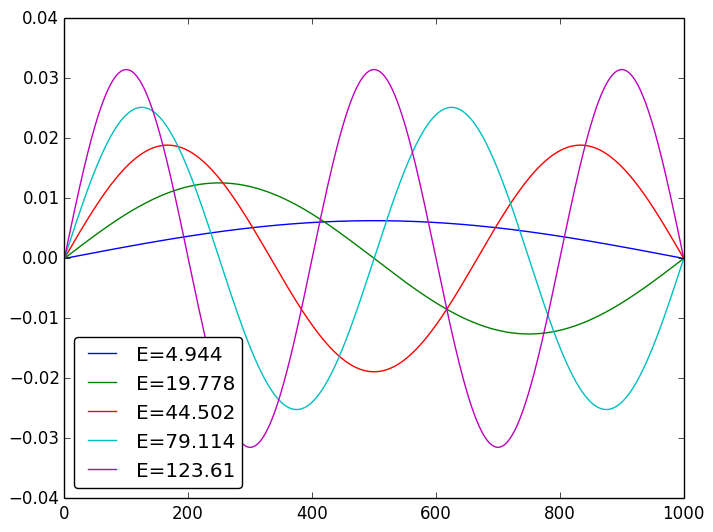

PyObject <matplotlib.legend.Legend object at 0x137dff2c>

In [69]:
plot(1:1000, numerov_normaliza(1000, 4.944, f), label="E=4.944")
plot(1:1000, numerov_normaliza(1000, 19.778, f), label="E=19.778")
plot(1:1000, numerov_normaliza(1000, 44.502, f), label="E=44.502")
plot(1:1000, numerov_normaliza(1000, 79.114, f), label="E=79.114")
plot(1:1000, numerov_normaliza(1000, 123.61, f), label="E=123.61")
legend(loc="lower left",fancybox="true")